# Question 1. Importing Merged Data

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#pathway to dataframes
path = r'C:\Users\ajkap\Instacart Basket Analysis'

In [4]:
#Importing 'ords_prods_merged_aggregated_2_.pkl'
df_merged_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_aggregated_2_.pkl'))

## Sensitive customer data such as their names, address, email and any other personally identifiable information should be deleted. Upper management can also instruct on how to handle PII information in the data.

# Question 2. PII

In [4]:
# checking dataframe information
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32406041 entries, 0 to 32406040
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  order_id                int64   
 11  eval_set                object  
 12  order_number            int64   
 13  order_dow               int64   
 14  order_hour_of_day       int64   
 15  days_since_prior_order  float64 
 16  product_id              int64   
 17  add_to_cart_order       int64   
 18  reordered               int64   
 19  Unnamed: 0_y            int64   
 20  product_name            object  
 21  aisle_

# Question 4. Creating Segmentation

In [8]:
#Defining Regions
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Oklahoma','Texas', 'Arkansas', 'Louisiana', 'Alabama']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Creating region column base on state column.
df_merged_clean.loc[df_merged_clean['state'].isin (Northeast), 'region'] = 'Northeast'
df_merged_clean.loc[df_merged_clean['state'].isin (Midwest), 'region'] = 'Midwest'
df_merged_clean.loc[df_merged_clean['state'].isin (South), 'region'] = 'South'
df_merged_clean.loc[df_merged_clean['state'].isin (West), 'region'] = 'West'

In [10]:
# Checking new column.
df_merged_clean[['user_id', 'region', 'state']].head(20)

user_id   region       state
0     26711  Midwest    Missouri
1     26711  Midwest    Missouri
2     26711  Midwest    Missouri
3     26711  Midwest    Missouri
4     26711  Midwest    Missouri
5     26711  Midwest    Missouri
6     26711  Midwest    Missouri
7     26711  Midwest    Missouri
8     26711  Midwest    Missouri
9     26711  Midwest    Missouri
10    26711  Midwest    Missouri
11    26711  Midwest    Missouri
12    26711  Midwest    Missouri
13    26711  Midwest    Missouri
14    26711  Midwest    Missouri
15    26711  Midwest    Missouri
16    26711  Midwest    Missouri
17    26711  Midwest    Missouri
18    33890     West  New Mexico
19    33890     West  New Mexico

In [8]:
#Check shape
df_merged_clean.shape

(32406041, 36)

In [9]:
df_merged_clean['region'].value_counts()

South        10150868
West          8293217
Midwest       7597585
Northeast     5722939
Name: region, dtype: int64

# Spending Habits between Regions

In [10]:
#Check spending habits between regions
spending_habits = pd.crosstab(df_merged_clean['region'], df_merged_clean['spending_flag'], dropna = False)

Text(0.5, 1.0, 'Regional Spending Habit')

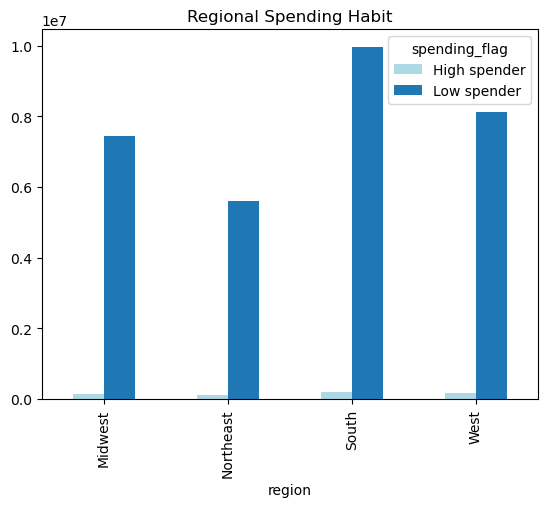

In [11]:
spending_habits_viz=spending_habits.plot.bar(color=['lightblue','tab:blue'])
plt.title('Regional Spending Habit')

In [12]:
# exporting the above visualization
spending_habits_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','regional_spending_habits.png'))

# Question 4. Excluding low activity customers

In [15]:
df_merged_clean.shape

(32406041, 36)

In [16]:
df_merged_clean.loc[df_merged_clean['max_order'] >= 5, 'customer_activity'] = 'High_activity_customers'

In [17]:
#Creating flag for low activity customers
df_merged_clean.loc[df_merged_clean['max_order']<5, 'customer_activity'] = 'Low_activity_customers'

In [18]:
#Checking value counts of customer_activity column
df_merged_clean['customer_activity'].value_counts(dropna= False)

High_activity_customers    30965686
Low_activity_customers      1440355
Name: customer_activity, dtype: int64

In [17]:
# Creating a Subset of low active customers.
low_active_customers = df_merged_clean[df_merged_clean['customer_activity'] == 'Low_activity_customers']

In [18]:
low_active_customers.head()

user_id first_name last_name gender           state  age date_joined  \
729   168851     Joseph   Hickman   Male  South Carolina   30    1/1/2017   
730   168851     Joseph   Hickman   Male  South Carolina   30    1/1/2017   
731   168851     Joseph   Hickman   Male  South Carolina   30    1/1/2017   
732   168851     Joseph   Hickman   Male  South Carolina   30    1/1/2017   
733   168851     Joseph   Hickman   Male  South Carolina   30    1/1/2017   

     n_dependants fam_status  income  ...  busiest_period_of_day max_order  \
729             0     single   63712  ...         Average_orders         3   
730             0     single   63712  ...            Most_orders         3   
731             0     single   63712  ...         Average_orders         3   
732             0     single   63712  ...         Average_orders         3   
733             0     single   63712  ...            Most_orders         3   

     loyalty_flag  average_price  spending_flag  median_prior_orders  \
729  New customer       7.485714    Low spender                 20.5   
730  New customer       7.485714    Low spender                 20.5   
731  New customer       7.485714    Low spender                 20.5   
732  New customer       7.485714    Low spender                 20.5   
733  New customer       7.485714    Low spender                 20.5   

      order_frequency_flag  _merge  region       customer_activity  
729  Non-frequent customer    both   South  Low_activity_customers  
730  Non-frequent customer    both   South  Low_activity_customers  
731  Non-frequent customer    both   South  Low_activity_customers  
732  Non-frequent customer    both   South  Low_activity_customers  
733  Non-frequent customer    both   South  Low_activity_customers  

[5 rows x 37 columns]

In [19]:
low_active_customers.shape

(1440355, 37)

In [20]:
# exporting the Low-activity customers subset
low_active_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','Low_activity_customers.pkl'))

In [21]:
# creating a subset for the High-activity customers
high_active_customers=df_merged_clean[df_merged_clean['customer_activity']=='High_activity_customers']

In [22]:
#Checking shape
high_active_customers.shape

(30965686, 37)

In [23]:
# Exporting 'high_active_customers' dataframe
high_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_active_customers.pkl'))

# Question 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [19]:
# Contuning the analysis with new 'high_active_customers' Dataframe.
df_new = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_active_customers.pkl'))

In [24]:
#Checking frequency of age column
df_new['age'].describe()

count    3.096569e+07
mean     4.946800e+01
std      1.848526e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [25]:
#Creating a new column for age category 
df_new.loc[(df_new['age'] >35) & (df_new['age'] <60), 'age_category'] = 'Middle Age'

In [26]:
#Creating 'Senior Citizens' column
df_new.loc[df_new['age']>60, 'age_category'] = 'Senior Citizens'

In [27]:
#Creating 'Young Age' column
df_new.loc[df_new['age'] <=35, 'age_category'] = 'Young Age'

In [28]:
df_new['age_category'].value_counts(dropna=False)

Middle Age         11651716
Senior Citizens    10112938
Young Age           8739122
NaN                  461910
Name: age_category, dtype: int64

In [79]:
df_new.shape

(30965686, 39)

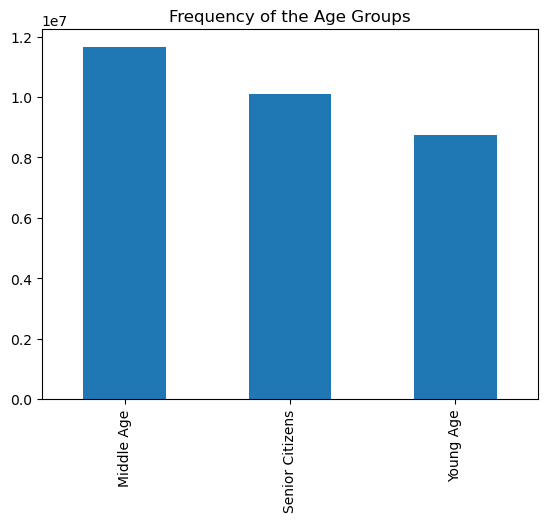

In [29]:
# creating a visualization

age_grp_bar=df_new['age_category'].value_counts().plot.bar(title='Frequency of the Age Groups')

In [30]:
# exporting the visualization
age_grp_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_groups_bar.png'))

## Income of Customers

In [13]:
#Check frequency of 'income' column
df_new['income'].describe()

count    3.096569e+07
mean     9.967573e+04
std      4.314168e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [77]:
#Check
df_new

user_id first_name last_name  gender     state  age date_joined  \
0           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4           26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
...           ...        ...       ...     ...       ...  ...         ...   
32405995   135902      Doris  Richmond  Female  Missouri   66    4/1/2020   
32405996   135902      Doris  Richmond  Female  Missouri   66    4/1/2020   
32405997   135902      Doris  Richmond  Female  Missouri   66    4/1/2020   
32405998   135902      Doris  Richmond  Female  Missouri   66    4/1/2020   
32405999   135902      Doris  Richmond  Female  Missouri   66    4/1/2020   

          n_dependants fam_status  income  ...  max_order  loyalty_flag  \
0                    3    married  165665  ...          8  New customer   
1                    3    married  165665  ...          8  New customer   
2                    3    married  165665  ...          8  New customer   
3                    3    married  165665  ...          8  New customer   
4                    3    married  165665  ...          8  New customer   
...                ...        ...     ...  ...        ...           ...   
32405995             2    married   53374  ...          8  New customer   
32405996             2    married   53374  ...          8  New customer   
32405997             2    married   53374  ...          8  New customer   
32405998             2    married   53374  ...          8  New customer   
32405999             2    married   53374  ...          8  New customer   

          average_price  spending_flag  median_prior_orders  \
0              7.988889    Low spender                 19.0   
1              7.988889    Low spender                 19.0   
2              7.988889    Low spender                 19.0   
3              7.988889    Low spender                 19.0   
4              7.988889    Low spender                 19.0   
...                 ...            ...                  ...   
32405995       6.960345    Low spender                  8.0   
32405996       6.960345    Low spender                  8.0   
32405997       6.960345    Low spender                  8.0   
32405998       6.960345    Low spender                  8.0   
32405999       6.960345    Low spender                  8.0   

          order_frequency_flag  _merge   region        customer_activity  \
0             Regular customer    both  Midwest  High_activity_customers   
1             Regular customer    both  Midwest  High_activity_customers   
2             Regular customer    both  Midwest  High_activity_customers   
3             Regular customer    both  Midwest  High_activity_customers   
4             Regular customer    both  Midwest  High_activity_customers   
...                        ...     ...      ...                      ...   
32405995     Frequent customer    both  Midwest  High_activity_customers   
32405996     Frequent customer    both  Midwest  High_activity_customers   
32405997     Frequent customer    both  Midwest  High_activity_customers   
32405998     Frequent customer    both  Midwest  High_activity_customers   
32405999     Frequent customer    both  Midwest  High_activity_customers   

             age_category  
0              Middle Age  
1              Middle Age  
2              Middle Age  
3              Middle Age  
4              Middle Age  
...                   ...  
32405995  Senior Citizens  
32405996  Senior Citizens  
32405997  Senior Citizens  
32405998  Senior Citizens  
32405999  Senior Citizens  

[30965686 rows x 38 columns]

In [33]:
#Creating 'Low Income' column
df_new.loc[(df_new['income'] >=25900) & (df_new['income'] <75000), 'income_groups'] = 'Low Income'
df_new.loc[(df_new['income'] >=75000) & (df_new['income'] <150000), 'income_groups'] = 'Medium Income'
df_new.loc[(df_new['income'] > 150000), 'income_groups'] = 'High Income'

In [34]:
#Checking result
df_new['income_groups'].value_counts(dropna=False)

Medium Income    17163226
Low Income        9907061
High Income       3894658
NaN                   741
Name: income_groups, dtype: int64

## Department

In [40]:
#Importing 'departments_wrangled.csv'
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [20]:
df_dep

Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing

In [11]:
df_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [41]:
# Rename column.
df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [28]:
#Dropping 'merge' column
df_merged= df_new.drop(columns = ['_merge'])

In [35]:
# Merging the departments dataframe with high_active_customers dataframe.
df_merged = df_new.merge(df_dep, on = 'department_id')

NameError: name 'df_dep' is not defined

In [ ]:
# checking the merge result.
df_merged[['user_id', 'department_id', 'department']].head(10)

## Dependents

In [5]:
# Checking the frequency of dependents column.de
df_merged_clean['n_dependants'].describe()

count    3.240604e+07
mean     1.501891e+00
std      1.118866e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [6]:
# checking marital status column.
df_merged_clean['fam_status'].value_counts(dropna = False)

married                             22757541
single                               5325934
divorced/widowed                     2771925
living with parents and siblings     1550641
Name: fam_status, dtype: int64

In [12]:
# Creating flag for number of dependents in a household.

df_merged_clean.loc[(df_merged_clean['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged_clean['n_dependants'] ==0), 'customer_profile'] = 'Single adult'

df_merged_clean.loc[(df_merged_clean['fam_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merged_clean['n_dependants'] >0), 'customer_profile'] = 'Young parent'

df_merged_clean.loc[(df_merged_clean['fam_status']=='married') & (df_merged_clean['n_dependants'] <=2), 'customer_profile'] = 'Family'

df_merged_clean.loc[(df_merged_clean['fam_status']=='married') & (df_merged_clean['n_dependants'] >2), 'customer_profile'] = 'Big Family'

In [13]:
#Checking results
df_merged_clean[['fam_status', 'n_dependants', 'customer_profile']].head(20)

fam_status  n_dependants customer_profile
0     married             3       Big Family
1     married             3       Big Family
2     married             3       Big Family
3     married             3       Big Family
4     married             3       Big Family
5     married             3       Big Family
6     married             3       Big Family
7     married             3       Big Family
8     married             3       Big Family
9     married             3       Big Family
10    married             3       Big Family
11    married             3       Big Family
12    married             3       Big Family
13    married             3       Big Family
14    married             3       Big Family
15    married             3       Big Family
16    married             3       Big Family
17    married             3       Big Family
18     single             0     Single adult
19     single             0     Single adult

In [ ]:
df_merged_clean['customer_profile'].value_counts(dropna=False)

In [ ]:
#Checking shape of merged column
df_merged.shape

# 6. Visualizations

In [36]:
#Creating bar chart of departments
bar_department = df_merged_clean['department'].value_counts().sort_index().plot.bar(title = 'The Number of Orders by Department')

KeyError: 'department'

In [37]:
# Creating bar chart for 'age_category' 
bar_age_category = df_merged_clean['age_category'].value_counts().sort_index().plot.bar()
plt.title('Distribution of Age Groups')

KeyError: 'age_category'

In [38]:
# Visualtization of 'distribution of family profiles'
bar_family = df_merged_clean['customer_profile'].value_counts().plot.bar(title = 'Distribution of Customer Profile')

KeyError: 'customer_profile'

In [25]:
#Exporting 'bar_family plot'
bar_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))

NameError: name 'bar_family' is not defined

# Question 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [6]:
#Aggregating max, mean, min variables on customer-profile
age_cat_agg = df_merged_clean.groupby('age_category',) [['days_since_prior_order', 'prices']].agg(['min','max','mean'])    

KeyError: 'age_category'

In [88]:
age_cat_agg

days_since_prior_order                  prices                
                                   min   max       mean    min   max      mean
age_category                                                                  
Middle Age                         0.0  30.0  10.805025    1.0  25.0  7.790901
Senior Citizens                    0.0  30.0  10.791909    1.0  25.0  7.796122
Young Age                          0.0  30.0  10.829029    1.0  25.0  7.784214

## Income class

In [89]:
# Aggregate min. max. and mean on customer's 'income_class' for usage and expenditure.
income_class_agg = df_merged.groupby('income_groups',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [90]:
income_class_agg

days_since_prior_order                  prices                
                          min   max       mean    min   max      mean
income                                                               
25903                    11.0  30.0  19.111111    1.2   7.4  3.375000
25911                     7.0  30.0  24.458333    1.4  13.9  6.675000
25937                     7.0  30.0  21.882353    1.1  14.0  6.982051
25941                     6.0  30.0  16.222222    1.3  14.3  5.677419
25955                     1.0  28.0   7.748072    1.1  15.0  6.907143
...                       ...   ...        ...    ...   ...       ...
584097                    0.0  17.0   4.831902    1.0  24.5  8.508019
590790                    5.0  30.0  13.634146    1.0  14.0  6.303846
591089                    1.0  30.0  10.117647    1.0  14.9  7.717143
592409                    2.0  30.0  10.777003    1.1  23.0  7.734185
593901                    1.0  28.0   6.247588    1.1  15.0  7.437147

[96069 rows x 6 columns]

## Aggregating Departments

In [62]:
# Aggregate min. max. and mean on customer's 'customer_profile' for usage and expenditure.
customer_profile_agg = df_merged.groupby('customer_profile',)[['days_since_prior_order','prices']].agg(['min','max','mean'])

In [64]:
customer_profile_agg

days_since_prior_order                  prices        \
                                    min   max       mean    min   max   
customer_profile                                                        
Big Family                          0.0  30.0  10.825655    1.0  25.0   
Family                              0.0  30.0  10.818509    1.0  25.0   
Single adult                        0.0  30.0  10.791963    1.0  25.0   
Young parent                        0.0  30.0  10.750988    1.0  25.0   

                            
                      mean  
customer_profile            
Big Family        7.790856  
Family            7.789937  
Single adult      7.789521  
Young parent      7.800584

In [65]:
dep_cus_profile_agg

NameError: name 'dep_cus_profile_agg' is not defined

# Questions 08. & 09. Customers Profiles Across Regions and Departments with Visualizations

In [12]:
# Checking the relationship of 'age_category' & 'income_groups' of customers profile in differnet regions.
profile_age_reg = df_merged_clean.groupby('region')[['income_groups','age_category']].value_counts().reset_index(name='count')

KeyError: "Columns not found: 'income_groups', 'age_category'"

In [75]:
profile_age_reg

NameError: name 'profile_age_reg' is not defined

In [76]:
# Checking income_class by regions.
region_income = pd.crosstab(df_merged_clean['income_groups'],df_merged_clean['region'], dropna = False)

KeyError: 'income_groups'

In [112]:
region_income

region         Midwest  Northeast    South     West
income_groups                                      
High Income     916998     677704  1197503  1009621
Low Income     2300620    1730055  3128019  2562635
Medium Income  4043611    3057070  5372267  4355257

In [51]:
# Checking income_class by regions
region_income = pd.crosstab(df_merged_clean['income_groups'],df_merged_clean['region'], dropna = False)

KeyError: 'income_groups'

In [43]:
# Visualtization of 'income_class' and 'region'
bar_region_income = region_income.plot.bar(title = 'Income Class Across Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

NameError: name 'region_income' is not defined

In [30]:
# Export bar chart
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_income.png'))

NameError: name 'bar_region_income' is not defined

In [29]:
# Pivot the data to create a stacked bar chart to see relationship between 'departments' and 'customers_profile'
customer_fam_dep = df_merged.groupby(['department', 'customer_profile']).size().unstack(fill_value=0)

KeyError: 'department'

In [7]:
#stacked bar graph
stacked_cust_dept = customer_fam_dep.plot.bar(stacked = True, title = 'Customer Profile by Departments')

NameError: name 'customer_fam_dep' is not defined